In [27]:
"""Importing Libraries"""
import numpy as np
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import plotly.express as px

In [17]:
data = pd.read_csv(r"../data/rf-0917-FinalRecDB-rms",delimiter='\s+')
data.head(10)

,REC_ID,REC_X,UX,REC_Y,UY,REC_Z,UZ,DRIFTA,UA,DRIFTB,...,TOTDAYS,NHITS,TOTDRIF1,C,UC,RMSERR,ZSTOP,D_WT,TOTDRIF2,TTINVOFF
0,18351965,350990.906,1,2897961.75,1,2814.000,1,1.398789,1,-0.174931,...,33.86457,20367,-0.457398,0.0,0,0.098,205.77249,1.0,-0.457373,5627.6
1,18991901,351793.969,1,2897163.00,1,2840.476,1,-5.659193,1,0.324557,...,34.27655,20058,-0.028687,0.0,0,0.098,205.11893,1.0,-0.028681,5678.8
2,19632445,352585.562,1,2903972.25,1,2764.134,1,0.160346,1,0.322054,...,33.05206,26199,1.565674,0.0,0,0.090,204.61726,1.0,1.565673,5527.6
3,18351997,350988.594,1,2898371.75,1,2791.304,1,1.111778,1,0.044403,...,33.64612,22268,0.540344,0.0,0,0.089,205.77235,1.0,0.540350,5582.0
4,18352029,350988.625,1,2898769.25,1,2777.045,1,-2.392966,1,0.273038,...,33.64802,24487,0.639771,0.0,0,0.087,205.77426,1.0,0.639764,5552.4
5,18352061,350985.750,1,2899170.00,1,2768.392,1,-4.285533,1,0.225390,...,33.86477,26744,-0.137269,0.0,0,0.096,205.77271,1.0,-0.137268,5536.0
6,18352093,350988.281,1,2899570.25,1,2777.254,1,0.217607,1,-0.024540,...,33.86464,26810,-0.057922,0.0,0,0.100,205.77257,1.0,-0.057909,5553.8
7,18352125,350991.438,1,2899966.75,1,2784.133,1,2.720406,1,0.009475,...,33.64619,27081,0.837158,0.0,0,0.094,205.77243,1.0,0.837168,5567.6
8,18352157,350987.906,1,2900372.75,1,2789.284,1,1.087362,1,-0.068798,...,33.64742,27651,-0.020386,0.0,0,0.093,205.77365,1.0,-0.020374,5578.0
9,18352189,350985.688,1,2900775.25,1,2792.607,1,1.649406,1,0.021399,...,33.65068,26718,0.584229,0.0,0,0.087,205.56009,1.0,0.584230,5584.4


In [36]:
data.describe()

,REC_ID,REC_X,UX,REC_Y,UY,REC_Z,UZ,DRIFTA,UA,DRIFTB,...,TOTDAYS,NHITS,TOTDRIF1,C,UC,RMSERR,ZSTOP,D_WT,TOTDRIF2,TTINVOFF
count,1.700000e+03,1700.000000,1700.0,1.700000e+03,1700.0,1700.000000,1700.0,1700.000000,1700.0,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.0,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,2.434724e+07,358481.741648,1.0,2.907151e+06,1.0,2334.454220,1.0,-0.658294,1.0,0.052783,...,33.669753,14262.398824,0.073807,-0.000088,0.0,0.113530,198.267987,0.992353,0.072833,4672.661412
std,3.239061e+06,4048.362666,0.0,5.918193e+03,0.0,371.232196,0.0,5.077198,0.0,0.303791,...,2.065156,6784.502828,1.129854,0.019555,0.0,0.019887,5.507850,0.087138,1.131279,742.314865
min,1.835196e+07,350982.844000,1.0,2.895168e+06,1.0,1724.506000,1.0,-31.402645,1.0,-1.228725,...,12.422780,0.000000,-9.372680,-0.640000,0.0,0.000000,184.549030,0.000000,-9.372683,3451.600000
25%,2.187184e+07,355386.156500,1.0,2.902371e+06,1.0,1955.273000,1.0,-3.690914,1.0,-0.123220,...,32.908180,8917.500000,-0.318176,0.000000,0.0,0.101000,194.764505,1.000000,-0.319413,3914.550000
50%,2.443203e+07,358581.640500,1.0,2.907369e+06,1.0,2287.925500,1.0,-0.509217,1.0,0.034945,...,33.580325,11745.500000,0.041504,0.000000,0.0,0.111000,199.179495,1.000000,0.044240,4580.900000
75%,2.699250e+07,361788.390750,1.0,2.911971e+06,1.0,2749.491500,1.0,2.662992,1.0,0.222621,...,35.143307,20334.000000,0.428375,0.000000,0.0,0.122250,202.781762,1.000000,0.431964,5502.300000
max,3.083320e+07,366594.188000,1.0,2.918374e+06,1.0,2874.911000,1.0,19.561554,1.0,3.526444,...,38.948700,29475.000000,14.566652,0.490000,0.0,0.310000,205.774260,1.000000,14.566628,6000.000000


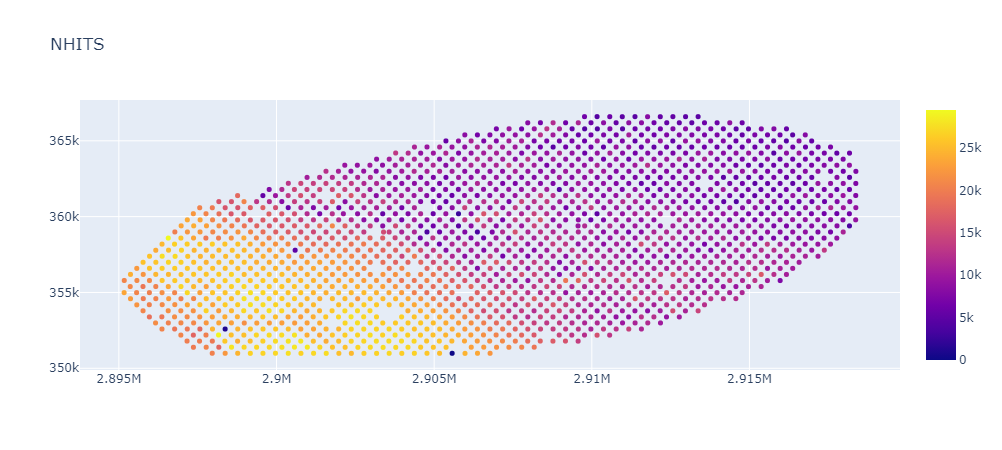

In [26]:
# Bubble Plot 1
fig = go.Figure(
    data=[
        go.Scatter(
            x=data['REC_X'],
            y=data['REC_Y'],
            mode='markers',
            marker=dict(
                size=3,
                color=data['NHITS'],
                showscale=True
            )
        )
    ],
    layout=go.Layout(
        title='NHITS'
    )
)
# pyo.plot(figure_or_data=fig)
fig.show()

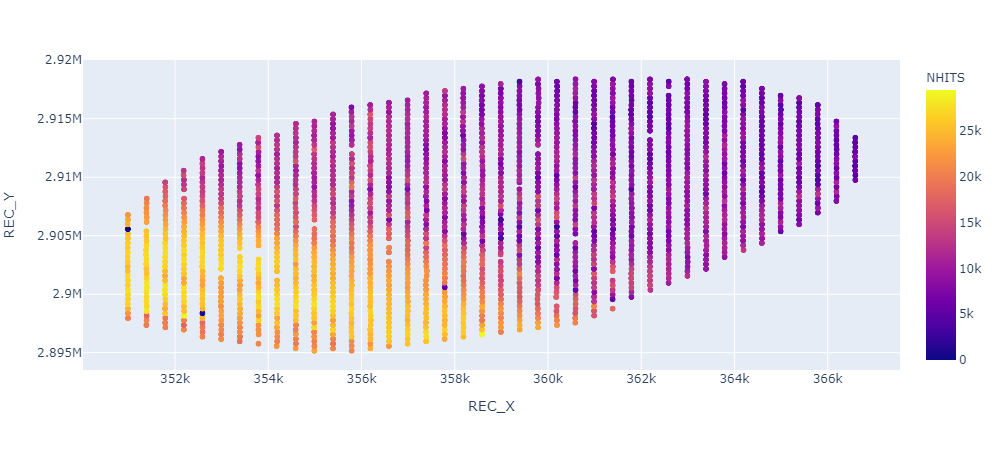

In [29]:
fig = px.scatter(data, x="REC_X", y="REC_Y", color="NHITS")
fig.show()

In [40]:
data.columns

Index(['REC_ID', 'REC_X', 'UX', 'REC_Y', 'UY', 'REC_Z', 'UZ', 'DRIFTA', 'UA',
       'DRIFTB', 'UB', 'ZSTART', 'ZDEPLOY', 'ZPICKUP', 'TOTDAYS', 'NHITS',
       'TOTDRIF1', 'C', 'UC', 'RMSERR', 'ZSTOP', 'D_WT', 'TOTDRIF2',
       'TTINVOFF'],
      dtype='object')

In [41]:
"asd sdf def".split()

['asd', 'sdf', 'def']